In [2]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

df_train = pd.read_csv('../input/train.csv')
train = df_train['review'].to_numpy()
df_y_train = pd.read_csv('../input/y_train.csv')
y_train = df_y_train['rate'].to_numpy()
df_val = pd.read_csv('../input/val.csv')
val = df_val['review'].to_numpy()
df_y_val = pd.read_csv('../input/y_val.csv')
y_val = df_y_val['rate'].to_numpy()

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.test.utils import datapath
from gensim import utils
from pathlib import Path
import gensim
model = gensim.models.Word2Vec.load('../embedding/word2vec.model')
ave_vec = np.zeros((train.shape[0],50),dtype='float')
word_vectors = model.wv
len(word_vectors.vocab)
for k, seq in enumerate(train):
    tokens = gensim.utils.simple_preprocess(seq)
    for i in tokens:
        if i in word_vectors.vocab: 
            ave_vec[k] += model.wv[i]
    ave_vec[k] /= len(tokens)
print(ave_vec.shape)

2019-12-07 12:27:22,673 : INFO : loading Word2Vec object from ../embedding/word2vec.model
2019-12-07 12:27:22,684 : INFO : loading wv recursively from ../embedding/word2vec.model.wv.* with mmap=None
2019-12-07 12:27:22,684 : INFO : setting ignored attribute vectors_norm to None
2019-12-07 12:27:22,685 : INFO : loading vocabulary recursively from ../embedding/word2vec.model.vocabulary.* with mmap=None
2019-12-07 12:27:22,685 : INFO : loading trainables recursively from ../embedding/word2vec.model.trainables.* with mmap=None
2019-12-07 12:27:22,685 : INFO : setting ignored attribute cum_table to None
2019-12-07 12:27:22,686 : INFO : loaded ../embedding/word2vec.model


(22159, 50)


In [3]:
word_vectors = model.wv
len(word_vectors.vocab)
ave_vec_val = np.zeros((val.shape[0],50),dtype='float')
for k, seq in enumerate(val):
    tokens = gensim.utils.simple_preprocess(seq)
    for i in tokens:
        if i in word_vectors.vocab: 
            ave_vec_val[k] += model.wv[i]
    ave_vec_val[k] /= np.array(len(tokens))
print(ave_vec_val.shape)

(5540, 50)


In [4]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from collections import Counter
n_alphas = 36
#alphas = np.exp(np.linspace(-5,10,n_alphas))
C = np.exp(np.linspace(-5,10,n_alphas))
print(Counter(y_train))
print(Counter(y_val))
stra = {5.0:15214,
        4.0:10000, 
        3.0:2000,
        2.0:1000,
        1.0:1000}
sm = SMOTE(random_state=42, sampling_strategy=stra)
X_res, y_res = sm.fit_resample(ave_vec, y_train)
print(Counter(y_res))

train_score = []
val_score = []
for j,i in enumerate(C):
    m = LogisticRegression(penalty='l2',C=i,class_weight='balanced',n_jobs=-1).fit(X_res, y_res)
    train_pre = m.predict(ave_vec)
    val_pre = m.predict(ave_vec_val)
    train_score.append(f1_score(y_train, train_pre, average='macro'))
    val_score.append(f1_score(y_val, val_pre, average='macro'))


Using TensorFlow backend.


Counter({5.0: 15214, 4.0: 5466, 3.0: 959, 1.0: 263, 2.0: 257})
Counter({5.0: 3804, 4.0: 1367, 3.0: 240, 1.0: 65, 2.0: 64})
Counter({5.0: 15214, 4.0: 10000, 3.0: 2000, 2.0: 1000, 1.0: 1000})


/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:46

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:46

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:46

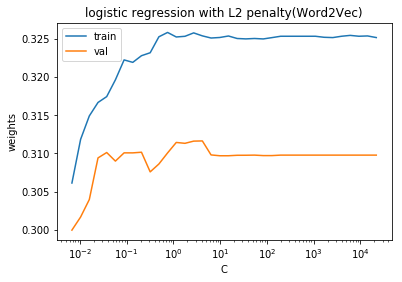

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.31161464298317126
confusion matrix is: 
 [[  32   16    6    4    7]
 [  21   30    7    3    3]
 [  35   48   57   59   41]
 [  83  118  162  390  614]
 [ 177  171  136  591 2729]]
f1 of each class:
 [0.15496368 0.13422819 0.1875     0.32311516 0.75826619]


['../input/model_w2v/logistic_L2.pkl']

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
ax = plt.gca()
ax.plot(C, train_score, label='train')
ax.plot(C, val_score, label='val')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('C')
plt.ylabel('weights')
plt.title('logistic regression with L2 penalty(Word2Vec)')
plt.axis('tight')
plt.legend()
plt.show()
C_opt = C[np.argmax(val_score)]
m_opt = LogisticRegression(penalty='l2',C=C_opt,class_weight='balanced',n_jobs=-1).fit(X_res, y_res)
print(f1_score(y_val, m_opt.predict(ave_vec_val), average='macro'))
mat = confusion_matrix(y_val, m_opt.predict(ave_vec_val))
print('confusion matrix is: \n',mat)
print('f1 of each class:\n',f1_score(y_val, m_opt.predict(ave_vec_val), average=None))
joblib.dump(m_opt,'../input/model_w2v/logistic_L2.pkl')

In [9]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from collections import Counter
n_alphas = 36
#alphas = np.exp(np.linspace(-5,10,n_alphas))
C = np.exp(np.linspace(-5,10,n_alphas))
print(Counter(y_train))
print(Counter(y_val))
stra = {5.0:15214,
        4.0:10000, 
        3.0:2000,
        2.0:1000,
        1.0:1000}
sm = SMOTE(random_state=42, sampling_strategy=stra)
X_res, y_res = sm.fit_resample(ave_vec, y_train)
print(Counter(y_res))

train_score = []
val_score = []
for j,i in enumerate(C):
    m = LogisticRegression(penalty='l1',C=i,class_weight='balanced',n_jobs=-1, solver='saga', tol=0.001).fit(X_res, y_res)
    train_pre = m.predict(ave_vec)
    val_pre = m.predict(ave_vec_val)
    train_score.append(f1_score(y_train, train_pre, average='macro'))
    val_score.append(f1_score(y_val, val_pre, average='macro'))

Counter({5.0: 15214, 4.0: 5466, 3.0: 959, 1.0: 263, 2.0: 257})
Counter({5.0: 3804, 4.0: 1367, 3.0: 240, 1.0: 65, 2.0: 64})
Counter({5.0: 15214, 4.0: 10000, 3.0: 2000, 2.0: 1000, 1.0: 1000})


/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/a

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


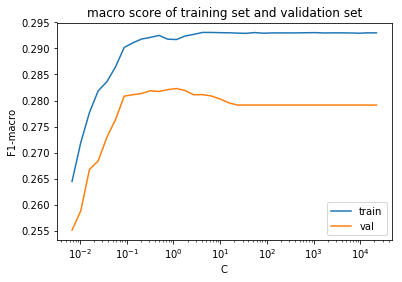

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.2823075039003511
confusion matrix is: 
 [[  25   23    9    2    6]
 [  19   36    5    2    2]
 [  38   61   73   44   24]
 [  90  161  263  375  478]
 [ 239  238  283  667 2377]]
F1 score of each class:
 [0.10504202 0.12349914 0.1672394  0.30525031 0.71050665]


['../input/model_w2v/logistic_L1.pkl']

In [11]:
# SMOTE with L1
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
ax = plt.gca()
ax.plot(C, train_score, label='train')
ax.plot(C, val_score,label='val')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('C')
plt.ylabel('F1-macro')
plt.title('macro score of training set and validation set')
plt.axis('tight')
plt.legend()
plt.show()
C_opt = C[np.argmax(val_score)]
m_opt = LogisticRegression(penalty='l1',C=C_opt,class_weight='balanced',n_jobs=-1, solver='saga', tol=0.001).fit(X_res, y_res)
print(f1_score(y_val, m_opt.predict(ave_vec_val), average='macro'))
mat = confusion_matrix(y_val, m_opt.predict(ave_vec_val))
print('confusion matrix is: \n',mat)
print('F1 score of each class:\n',f1_score(y_val, m_opt.predict(ave_vec_val), average=None))
joblib.dump(m_opt,'../input/model_w2v/logistic_L1.pkl')

In [19]:
# elastic net
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from collections import Counter
n_alphas = 36
#alphas = np.exp(np.linspace(-5,10,n_alphas))
C = np.exp(np.linspace(-5,10,n_alphas))
print(Counter(y_train))
print(Counter(y_val))
stra = {5.0:15214,
        4.0:10000, 
        3.0:2000,
        2.0:1000,
        1.0:1000}
sm = SMOTE(random_state=42, sampling_strategy=stra)
X_res, y_res = sm.fit_resample(ave_vec, y_train)
print(Counter(y_res))
a = np.linspace(0.2,0.7,6)
train_score = [[],[],[],[],[],[]]
val_score = [[],[],[],[],[],[]]
for n,u in enumerate(a):
    for j,i in enumerate(C):
        m = LogisticRegression(penalty='elasticnet',C=i,class_weight='balanced',n_jobs=-1, l1_ratio=u,solver='saga').fit(X_res, y_res)
        train_pre = m.predict(ave_vec)
        val_pre = m.predict(ave_vec_val)
        train_score[n].append(f1_score(y_train, train_pre, average='macro'))
        val_score[n].append(f1_score(y_val, val_pre, average='macro'))


Counter({5.0: 15214, 4.0: 5466, 3.0: 959, 1.0: 263, 2.0: 257})
Counter({5.0: 3804, 4.0: 1367, 3.0: 240, 1.0: 65, 2.0: 64})
Counter({5.0: 15214, 4.0: 10000, 3.0: 2000, 2.0: 1000, 1.0: 1000})


/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/a

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/a

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [29]:
elastic_opt = LogisticRegression(penalty='elasticnet',C=C[(np.argmax(val_score))%36],class_weight='balanced',n_jobs=-1, l1_ratio=a[(np.argmax(val_score))//36],solver='saga')

In [30]:
elastic_opt.fit(X_res,y_res)
print('the best macro score on validation set:',f1_score(y_val, elastic_opt.predict(ave_vec_val), average='macro'))
mat = confusion_matrix(y_val, elastic_opt.predict(ave_vec_val))
print('confusion matrix is: \n',mat)
print('accuracy of each class:\n',f1_score(y_val, elastic_opt.predict(ave_vec_val), average=None))

/home/zixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


the best macro score on validation set: 0.2848942737772833
confusion matrix is: 
 [[  28   20    9    2    6]
 [  19   34    6    3    2]
 [  32   65   76   43   24]
 [  88  161  263  374  481]
 [ 242  230  286  667 2379]]
accuracy of each class:
 [0.11814346 0.1184669  0.17272727 0.30456026 0.71057348]


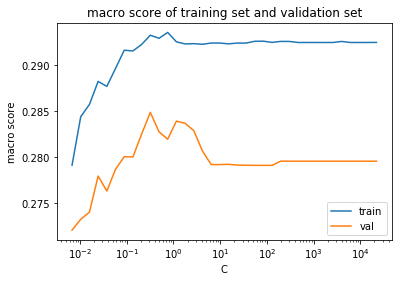

In [33]:
train_score = np.array(train_score)
val_score = np.array(val_score)
ax1 = plt.gca()
# randomly choose 50 coefficients in the 9676 variables 
# to plot figure of coefs vs regularizer. 
ax1.plot(C, train_score[(np.argmax(val_score))//36], label='train')
ax1.plot(C, val_score[(np.argmax(val_score))//36],label='val')
ax1.set_xscale('log')
#ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
plt.xlabel('C')
plt.ylabel('macro score')
plt.title('macro score of training set and validation set')
plt.axis('tight')
plt.legend()
plt.show()

In [27]:
val_score[(np.argmax(val_score))//36][(np.argmax(val_score))%36]

0.2848942737772833

In [34]:
joblib.dump(elastic_opt,'../input/model_w2v/logistic_elastic.pkl')

['../input/model_w2v/logistic_elastic.pkl']